## 1: Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [3]:
pip install pandas numpy matplotlib seaborn folium

   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.9 kB ? eta -:--:--
   -------------- ------------------------ 41.0/110.9 kB 653.6 kB/s eta 0:00:01
   ---------------------- ----------------- 61.4/110.9 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 61.4/110.9 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 61.4/110.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 110.9/110.9 kB 459.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [7]:
# Display basic info to verify loading
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 2: Visualize Restaurant Locations on a Map

In [9]:
# Create a base map centered around the mean latitude and longitude
mean_lat = df['Latitude'].mean()
mean_lon = df['Longitude'].mean()
restaurant_map = folium.Map(location=[mean_lat, mean_lon], zoom_start=2)

In [11]:
# Add a marker cluster to handle large numbers of points
marker_cluster = MarkerCluster().add_to(restaurant_map)

In [13]:
# Add a marker cluster to handle large numbers of points
marker_cluster = MarkerCluster().add_to(restaurant_map)

In [15]:
# Save the map to an HTML file
restaurant_map.save("restaurant_map.html")
print("Interactive map saved as 'restaurant_map.html'. Open it in a browser to view.")

Interactive map saved as 'restaurant_map.html'. Open it in a browser to view.


In [17]:
# Note: In Jupyter, you can display it directly with:
restaurant_map

## 3: Analyze Distribution of Restaurants Across Cities or Countries

a. Distribution by Country

In [19]:
# Distribution by Country Code
country_dist = df['Country Code'].value_counts()
print("\nRestaurant Count by Country Code:")
print(country_dist)


Restaurant Count by Country Code:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


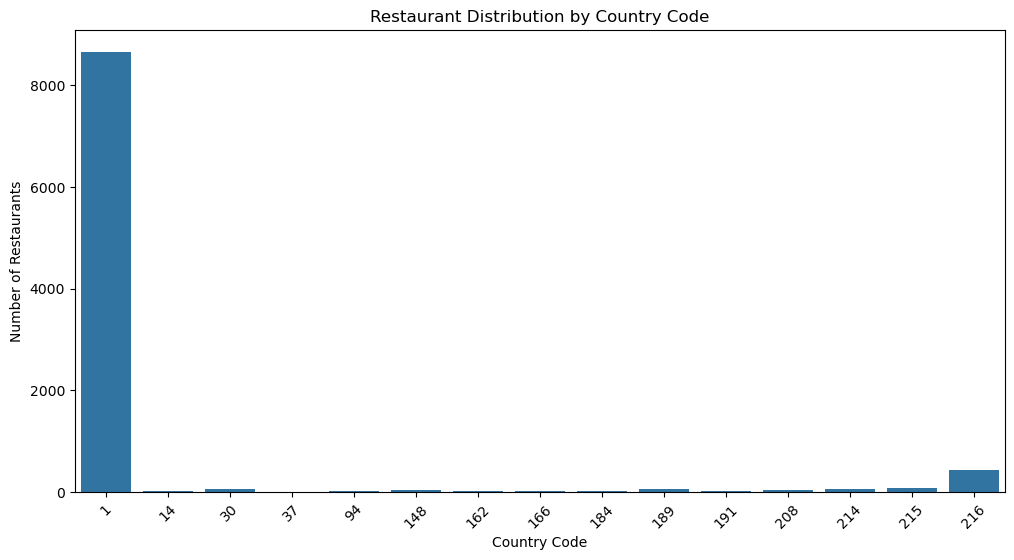

In [21]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=country_dist.index, y=country_dist.values)
plt.title('Restaurant Distribution by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

b. Distribution by City (Top 10)

In [23]:
# Distribution by City (top 10)
city_dist = df['City'].value_counts().head(10)
print("\nTop 10 Cities by Restaurant Count:")
print(city_dist)


Top 10 Cities by Restaurant Count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


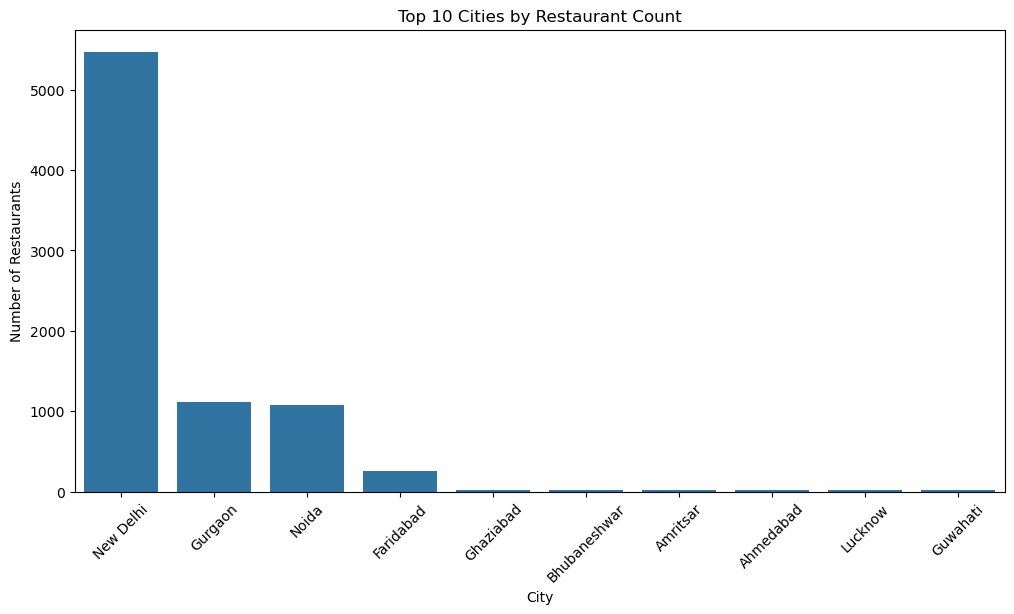

In [25]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=city_dist.index, y=city_dist.values)
plt.title('Top 10 Cities by Restaurant Count')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

## 4: Correlation Between Location and Rating

a. Scatter Plot with Rating

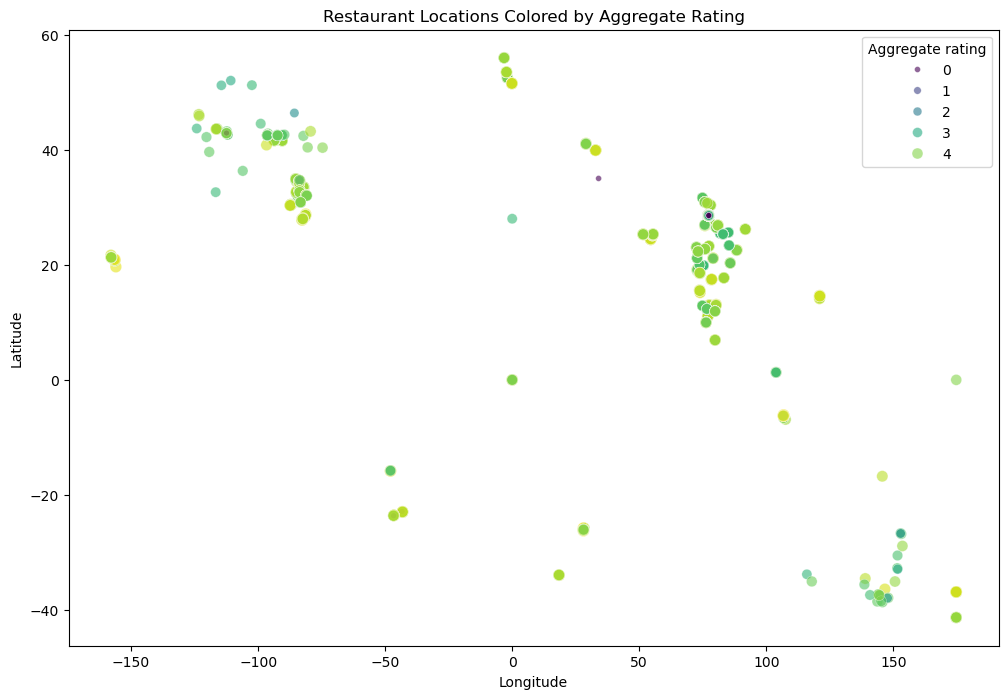

In [27]:
# Scatter plot of Latitude vs Longitude colored by Aggregate rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Aggregate rating', size='Aggregate rating', 
                data=df, palette='viridis', alpha=0.6)
plt.title('Restaurant Locations Colored by Aggregate Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

b. Numerical Correlation (Latitude/Longitude vs Rating)

In [29]:
# Calculate correlation between latitude/longitude and rating
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation Matrix (Latitude, Longitude, Aggregate rating):")
print(correlation)


Correlation Matrix (Latitude, Longitude, Aggregate rating):
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


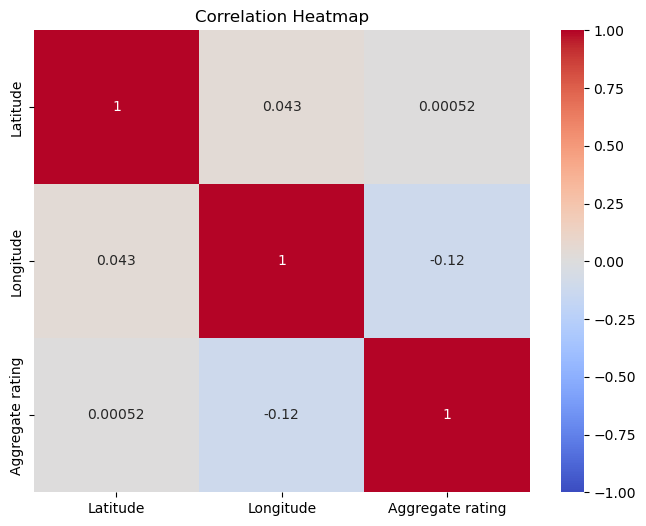

In [31]:
# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

c. Rating Distribution by Country/City

In [33]:
# Average rating by Country Code
country_rating = df.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Country Code:")
print(country_rating)


Average Rating by Country Code:
Country Code
162    4.468182
208    4.300000
94     4.295238
148    4.262500
214    4.233333
189    4.210000
215    4.087500
166    4.060000
216    4.004378
191    3.870000
30     3.763333
14     3.658333
37     3.575000
184    3.575000
1      2.523324
Name: Aggregate rating, dtype: float64


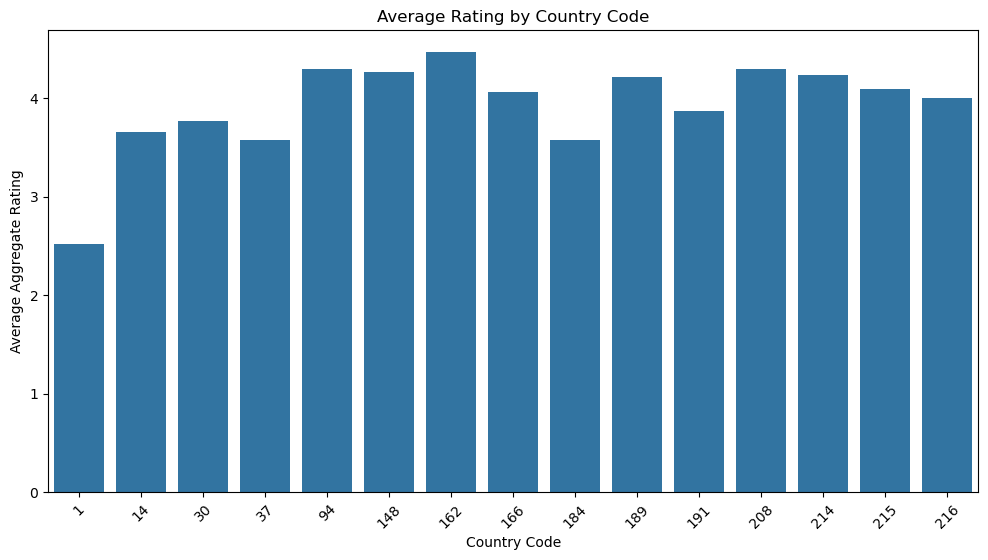

In [35]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=country_rating.index, y=country_rating.values)
plt.title('Average Rating by Country Code')
plt.xlabel('Country Code')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Average rating by City (top 10 by restaurant count)
city_rating = df.groupby('City')['Aggregate rating'].mean().loc[city_dist.index]
print("\nAverage Rating for Top 10 Cities:")
print(city_rating)


Average Rating for Top 10 Cities:
City
New Delhi       2.438845
Gurgaon         2.651431
Noida           2.036204
Faridabad       1.866932
Ghaziabad       2.852000
Bhubaneshwar    3.980952
Amritsar        3.685714
Ahmedabad       4.161905
Lucknow         4.195238
Guwahati        4.190476
Name: Aggregate rating, dtype: float64


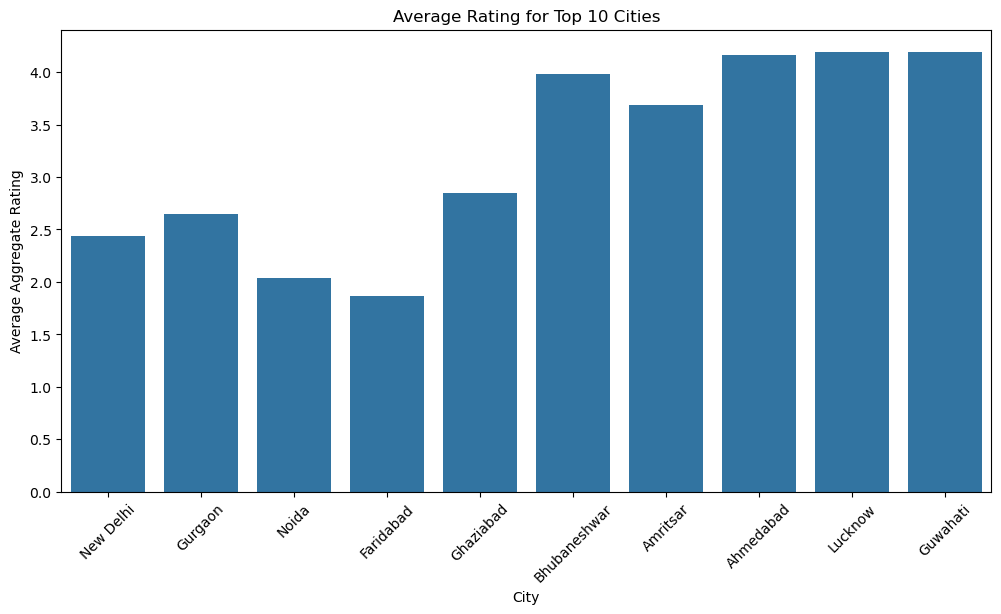

In [39]:
# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=city_rating.index, y=city_rating.values)
plt.title('Average Rating for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45)
plt.show()